In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("C:/Users/y/Downloads/HRDataset_v14.csv")
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [2]:
print(df.shape)           # Rows, Columns
print(df.columns)         # Column names
print(df.dtypes)          # Data types
print(df.isnull().sum())  # Missing values

(311, 36)
Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')
Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary          

In [4]:
print(df.columns)         # Column names


Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')


In [5]:
print("Total Employees:", df.shape[0])


Total Employees: 311


In [6]:
print(df['Termd'].value_counts())  # 0 = active, 1 = terminated


Termd
0    207
1    104
Name: count, dtype: int64


In [7]:
print(df['Sex'].value_counts())


Sex
F     176
M     135
Name: count, dtype: int64


In [8]:
print(df['Department'].value_counts())


Department
Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: count, dtype: int64


In [9]:
print("Average Salary:", df['Salary'].mean())


Average Salary: 69020.6848874598


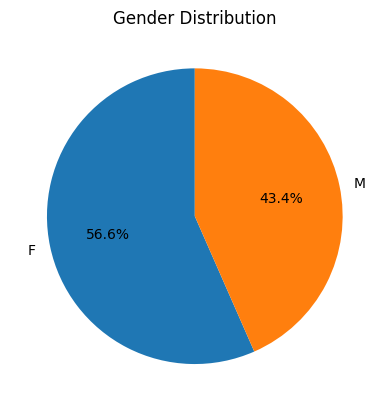

In [10]:
df['Sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()


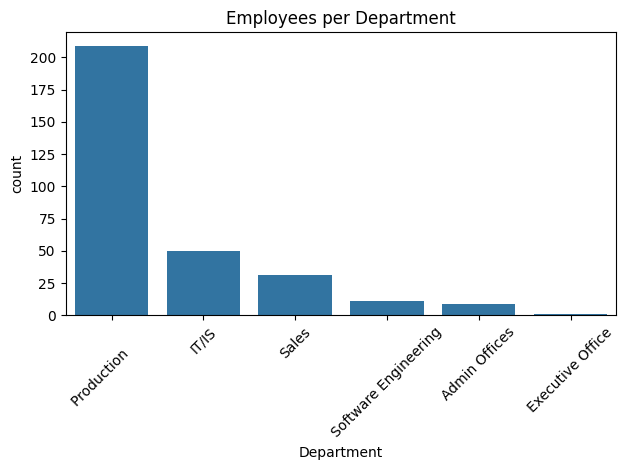

In [12]:
import seaborn as sns
sns.countplot(data=df, x='Department', order=df['Department'].value_counts().index)
plt.title("Employees per Department")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


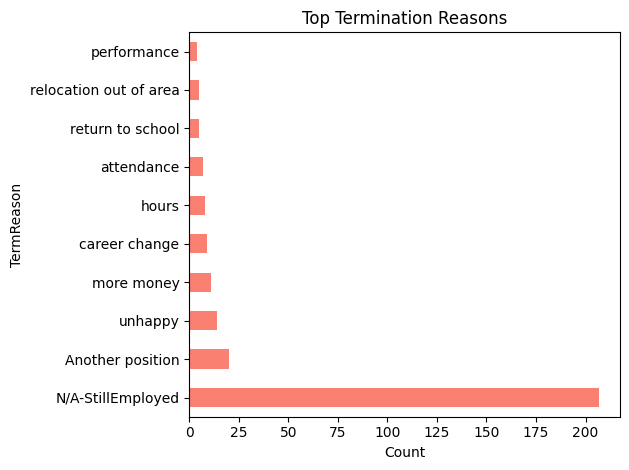

In [13]:
df['TermReason'].value_counts().head(10).plot(kind='barh', color='salmon')
plt.title("Top Termination Reasons")
plt.xlabel("Count")
plt.tight_layout()
plt.show()


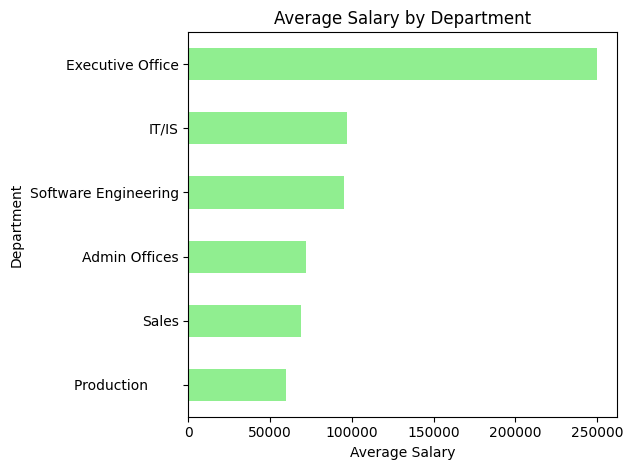

In [14]:
dept_salary = df.groupby('Department')['Salary'].mean().sort_values()
dept_salary.plot(kind='barh', color='lightgreen')
plt.title("Average Salary by Department")
plt.xlabel("Average Salary")
plt.tight_layout()
plt.show()


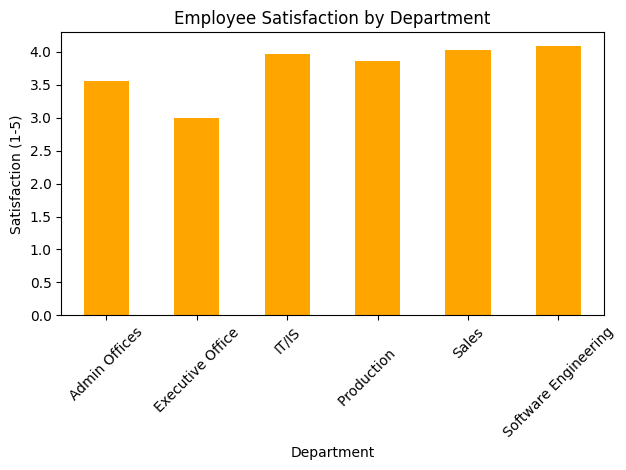

In [15]:
df.groupby('Department')['EmpSatisfaction'].mean().plot(kind='bar', color='orange')
plt.title("Employee Satisfaction by Department")
plt.ylabel("Satisfaction (1-5)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


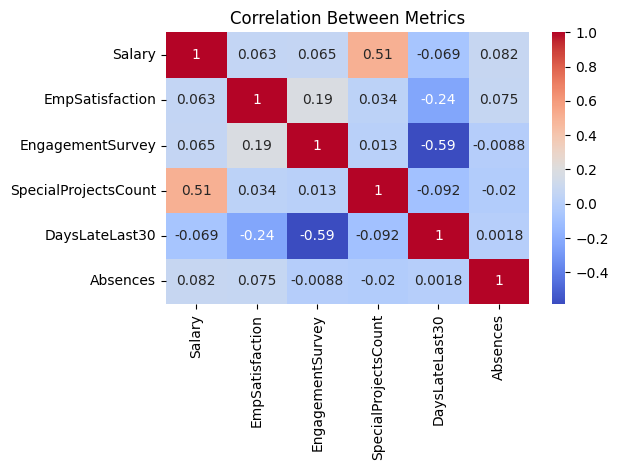

In [16]:
corr_cols = ['Salary', 'EmpSatisfaction', 'EngagementSurvey', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences']
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Metrics")
plt.tight_layout()
plt.show()
